# LFP example: regression vs estimation of difference
## Make and visualize model oscillation power
40 trials of "theta power" is generated for every animal. It is drawn randomly as a poisson process.

This is repeated for "stimulation" trials, but poisson rate is higher.

In [1]:
import altair as alt
from bayes_window import BayesWindow, models, BayesRegression, LMERegression, BayesConditions
from bayes_window.generative_models import generate_fake_lfp

try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:
# Draw some fake data:
df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=15, n_trials=30)

## Estimate posteriors for treatments

In [3]:
# Initialize:
window = BayesWindow(df=df, y='Power', #condition='stim',
                     group='mouse', 
                     treatment='stim')
# Fit:
estimation = BayesConditions(window).fit(dist_y='gamma')


n(Divergences) = 47


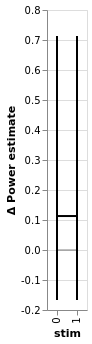

In [4]:
estimation.plot(color=':O')#.facet(column='mouse')

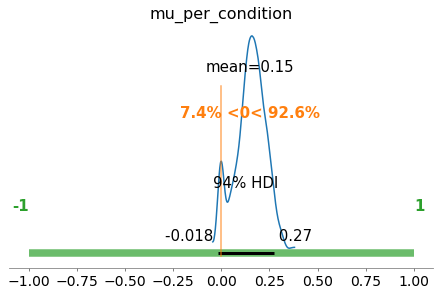

In [5]:
estimation.plot_BEST()

## Compare with regression approach

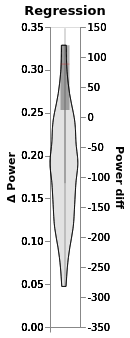

In [6]:
# Initialize:
# window = BayesWindow(df=df, y='Power', treatment='stim', group='mouse')
# Fit:
regression = BayesRegression(window).fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma')
(regression.chart + regression.chart_posterior_kde).properties(title='Regression')

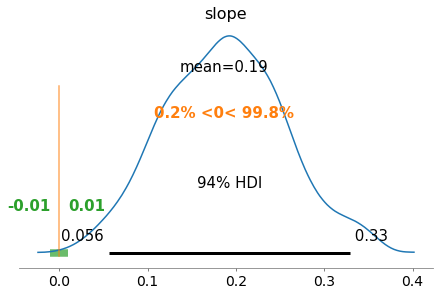

In [7]:
regression.plot_BEST()

## Evaluate sensitivity: CM

In [8]:

import numpy as np

from bayes_window import model_comparison, BayesWindow
from bayes_window.generative_models import generate_fake_lfp


### y=Power

In [9]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Power',),
                                      methods=('bc_gamma','bw_gamma',),
                                      parallel=True)

  0%|          | 0/270 [00:00<?, ?it/s]

  4%|▍         | 12/270 [00:00<00:05, 47.27it/s]

  4%|▍         | 12/270 [00:19<00:05, 47.27it/s]

  9%|▉         | 24/270 [00:27<05:36,  1.37s/it]

 13%|█▎        | 36/270 [00:58<07:26,  1.91s/it]

 18%|█▊        | 48/270 [01:24<07:24,  2.00s/it]

 22%|██▏       | 60/270 [02:09<09:13,  2.64s/it]

 27%|██▋       | 72/270 [02:45<09:07,  2.77s/it]

 31%|███       | 84/270 [03:14<08:12,  2.65s/it]

 36%|███▌      | 96/270 [03:59<08:42,  3.00s/it]

 40%|████      | 108/270 [04:33<07:56,  2.94s/it]

 44%|████▍     | 120/270 [05:02<06:56,  2.78s/it]

 49%|████▉     | 132/270 [05:47<07:03,  3.07s/it]

 53%|█████▎    | 144/270 [06:20<06:16,  2.98s/it]

 58%|█████▊    | 156/270 [06:52<05:29,  2.89s/it]

 62%|██████▏   | 168/270 [07:34<05:12,  3.06s/it]

 67%|██████▋   | 180/270 [08:03<04:19,  2.88s/it]

 71%|███████   | 192/270 [08:39<03:47,  2.92s/it]

 76%|███████▌  | 204/270 [09:22<03:25,  3.12s/it]

 80%|████████  | 216/270 [09:53<02:39,  2.96s/it]

 84%|████████▍ | 228/270 [10:23<01:58,  2.82s/it]

 89%|████████▉ | 240/270 [11:06<01:31,  3.04s/it]

 93%|█████████▎| 252/270 [11:42<00:54,  3.02s/it]

 98%|█████████▊| 264/270 [12:13<00:17,  2.90s/it]

100%|██████████| 270/270 [12:13<00:00,  2.72s/it]

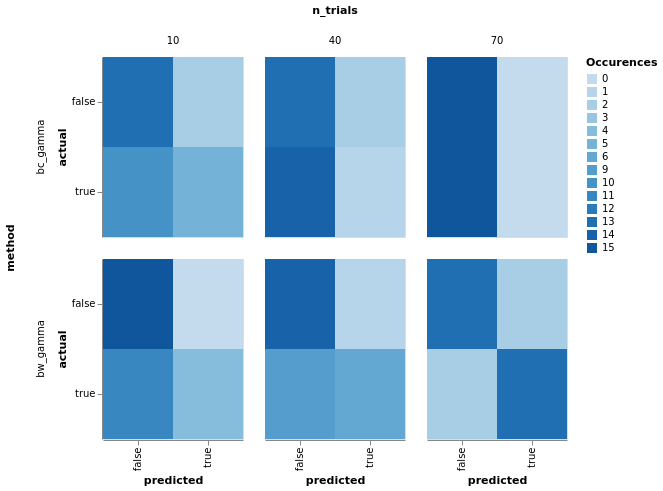

In [10]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

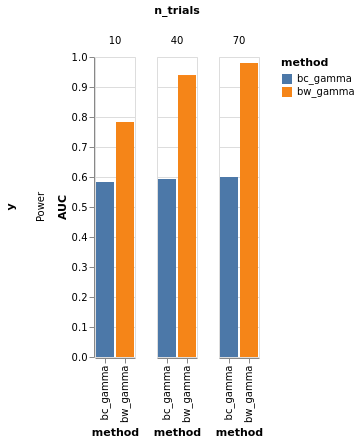

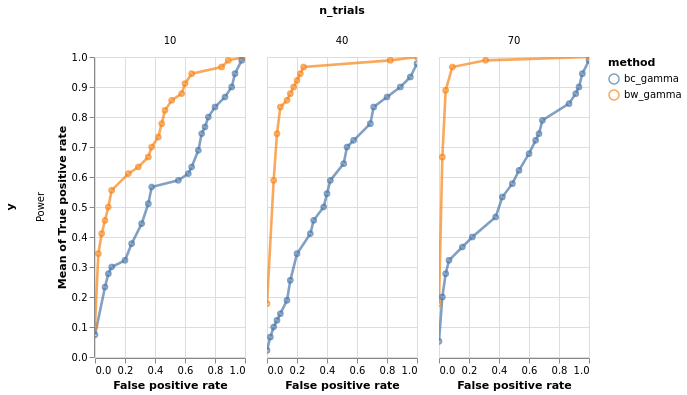

In [11]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP

### y=Log power

In [12]:
# NBVAL_SKIP
# Note: Only works with single ys and single true_slopes
res = model_comparison.run_conditions(true_slopes=np.hstack([np.zeros(15),
                                                             np.tile(10, 15)]),
                                      n_trials=np.linspace(10, 70, 3).astype(int),
                                      ys=('Log power',),
                                      methods=('bc_normal','bc_gamma','bc_student','bw_gamma',),
                                      parallel=True)

  0%|          | 0/270 [00:00<?, ?it/s]

  9%|▉         | 24/270 [00:47<08:08,  1.98s/it]

 13%|█▎        | 36/270 [01:57<13:55,  3.57s/it]

 18%|█▊        | 48/270 [03:01<15:42,  4.24s/it]

 22%|██▏       | 60/270 [04:42<19:54,  5.69s/it]

 27%|██▋       | 72/270 [05:47<18:29,  5.60s/it]

 31%|███       | 84/270 [06:53<17:13,  5.56s/it]

 36%|███▌      | 96/270 [08:38<19:05,  6.58s/it]

 40%|████      | 108/270 [09:45<16:55,  6.27s/it]

 44%|████▍     | 120/270 [10:48<14:51,  5.95s/it]

 49%|████▉     | 132/270 [12:28<15:23,  6.69s/it]

 53%|█████▎    | 144/270 [13:38<13:29,  6.42s/it]

 58%|█████▊    | 156/270 [14:42<11:34,  6.09s/it]

 62%|██████▏   | 168/270 [16:25<11:37,  6.84s/it]

 67%|██████▋   | 180/270 [17:30<09:36,  6.40s/it]

 71%|███████   | 192/270 [18:33<07:52,  6.06s/it]

 76%|███████▌  | 204/270 [20:15<07:28,  6.79s/it]

 80%|████████  | 216/270 [21:26<05:52,  6.53s/it]

 84%|████████▍ | 228/270 [22:32<04:21,  6.24s/it]

 89%|████████▉ | 240/270 [24:16<03:28,  6.94s/it]

 93%|█████████▎| 252/270 [25:22<01:57,  6.53s/it]

 98%|█████████▊| 264/270 [26:30<00:37,  6.27s/it]

100%|██████████| 270/270 [26:30<00:00,  5.89s/it]

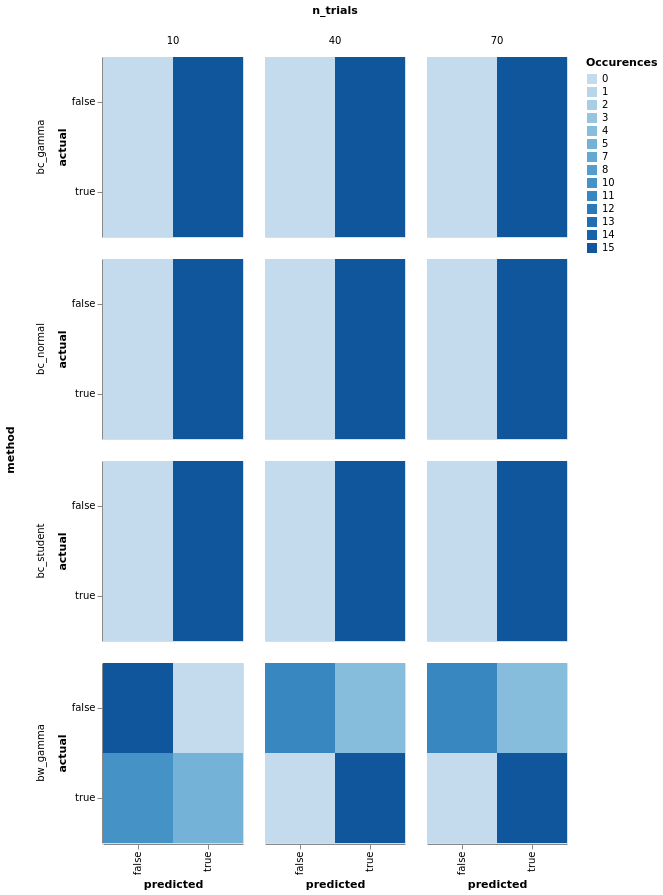

In [13]:
# NBVAL_SKIP
model_comparison.plot_confusion(
    model_comparison.make_confusion_matrix(res[res['y'] == 'Log power'], ('method', 'y', 'randomness', 'n_trials')
                                           )).properties(width=140).facet(row='method', column='n_trials')

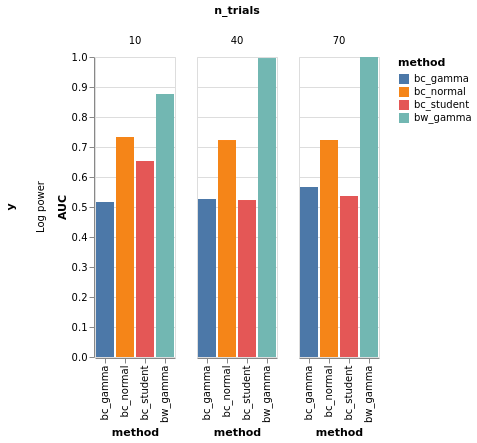

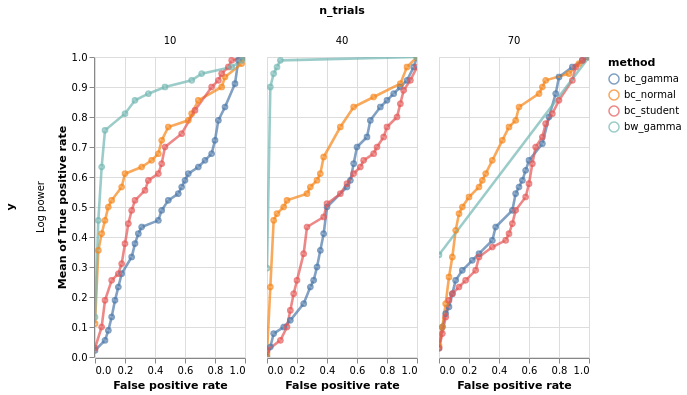

In [14]:
df = model_comparison.make_roc_auc(res, binary=False, groups=('method', 'y', 'n_trials'))

bars, roc = model_comparison.plot_roc(df)
bars.facet(column='n_trials', row='y').properties().display()
roc.facet(column='n_trials', row='y').properties()
# NBVAL_SKIP